In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5', order=3, covariance = True, num_bins = 125)

Filtering 782 bins for invalid input
Fitting 125 of 133561: /ATLAS_2019_I1736531/d02-x01-y01[AUX_pdfup]#6               

In [2]:
target_bins = ['/ATLAS_2019_I1736531/d01-x01-y01#0', '/ATLAS_2019_I1736531/d01-x01-y01#1',\
               '/ATLAS_2019_I1736531/d02-x01-y01#0','/ATLAS_2019_I1736531/d02-x01-y01#1']
target_values = jnp.array([1.0401, 1.1434, 1.0936, 1.261])
target_errors = jnp.array([0.0276, 0.0393, 0.0284, 0.0118])
summer_tune = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = False,
    target_bins = target_bins, target_values = target_values, target_errors = target_errors)
summer_tune_cov = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = True,
    target_bins = target_bins, target_values = target_values, target_errors = target_errors)

print(jnp.sqrt(jnp.diagonal(summer_tune.cov)))

[ 0  1 63 64]
Calculated inital guess:  [0.12639877]
Tuned Parameters:  [0.12683569] , Objective =  16.21767952672186 , chi2/ndf =  5.405893175573953
Covariance of Tuned Parameters:  [[3.25134492e-07]]
[ 0  1 63 64]
Calculated inital guess:  [0.12639877]
Tuned Parameters:  [0.12665194] , Objective =  6.129725646336898 , chi2/ndf =  2.0432418821122993
Covariance of Tuned Parameters:  [[3.68227745e-07]]
[0.00057021]


target deviation 3.5267, with confidence level 0.6827, edof 3.0000
target deviation 3.5267, with confidence level 0.6827, edof 3.0000


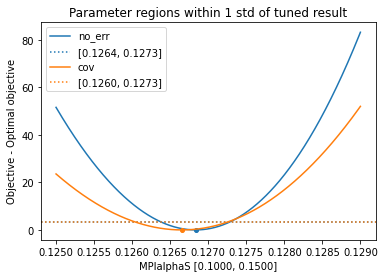

In [6]:
graph_range = [0.125,0.129]
summer_tune.graph_objective(graph_range = graph_range)
summer_tune_cov.graph_objective(new_figure = False, graph_range = graph_range)

[0, 1, 2, 3, 4, 5, 6]

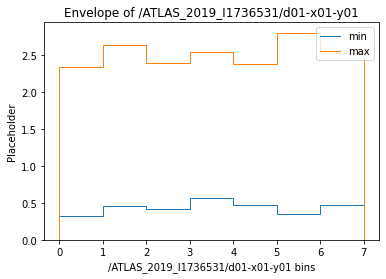

In [7]:
summer_tune.fits.graph_envelope('/ATLAS_2019_I1736531/d01-x01-y01')
summer_tune.fits.index['/ATLAS_2019_I1736531/d01-x01-y01']

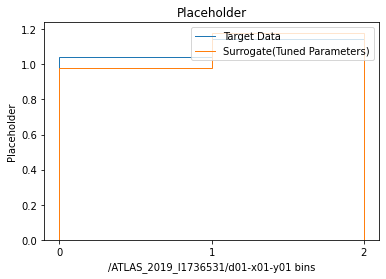

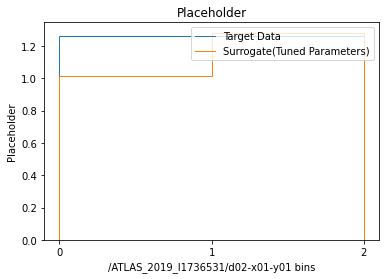

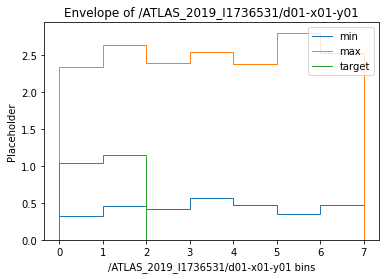

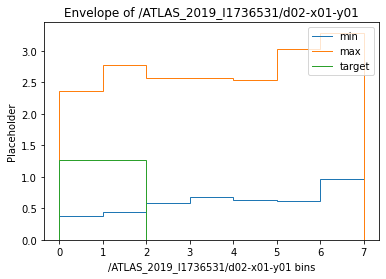

In [5]:
summer_tune.graph_tune('/ATLAS_2019_I1736531/d01-x01-y01')
summer_tune.graph_tune('/ATLAS_2019_I1736531/d02-x01-y01')
summer_tune.graph_envelope_target()